In [12]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../evaluation.csv')

In [5]:
df

,relatorio,voto,acordao,generated,model,n_examples,temperature,bert_score_precision,bert_score_recall,bert_score_f1,bleu_score,meteor_score,rouge1,rouge2,rougeL
0,1. Trata o presente processo da Prestação de C...,"Em face dos dados apresentados nos autos, veri...","Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.703757,0.678256,0.690771,0.462479,0.647883,0.667814,0.572414,0.578313
1,Tratam os autos da aposentadoria do servidor p...,Trata-se de apreciação da legalidade e registr...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.700539,0.708395,0.704445,0.262055,0.532079,0.476636,0.421546,0.453271
2,1. Tratam os autos de Denúncia protocolada na ...,O EXMO. SENHOR CONSELHEIRO ANTONIO CRISTOVÃO C...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.646800,0.675788,0.660976,0.178810,0.570724,0.383529,0.294811,0.322353
3,1. Trata-se de apreciação da legalidade e regi...,A EXMA. SENHORA CONSELHEIRA DULCINÉA BENÍCIO D...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.687704,0.701571,0.694568,0.279491,0.663503,0.565333,0.470588,0.410667
4,Tratam os autos da aposentadoria da servidora ...,Trata-se de apreciação da legalidade e registr...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.735396,0.751823,0.743519,0.403997,0.807132,0.635682,0.580451,0.608696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,1. Tratam os autos da Prestação de Contas do G...,O EXMO. SENHOR CONSELHEIRO ANTONIO CRISTOVÃO C...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama3.1,5,1.00,0.660402,0.770442,0.711191,0.098523,0.511459,0.368973,0.218947,0.213836
2846,1. Tratam os autos de Denúncia protocolada na ...,O EXMO. SENHOR CONSELHEIRO ANTONIO CRISTOVÃO C...,"Vistos, relatados e discutidos os autos do pro...","Sim, posso ajudar a resumir e analisar a decis...",llama3.1,5,1.00,0.712270,0.694781,0.703417,0.188102,0.368856,0.452138,0.310838,0.350305
2847,Tratam os autos da aposentadoria da servidora ...,Trata-se de apreciação da legalidade e registr...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama3.1,5,1.00,0.711748,0.718076,0.714898,0.249501,0.393385,0.526119,0.322097,0.373134
2848,1. Trata o presente processo da aposentadoria ...,A EXMA. SENHORA CONSELHEIRA-SUBSTITUTA MARIA D...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n**Pr...,llama3.1,5,1.00,0.710703,0.748854,0.729280,0.328118,0.519510,0.566285,0.410509,0.382979


In [14]:
df.columns

Index(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples',
       'temperature', 'bert_score_precision', 'bert_score_recall',
       'bert_score_f1', 'bleu_score', 'meteor_score', 'rouge1', 'rouge2',
       'rougeL'],
      dtype='object')

In [16]:
summary = df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model'], axis=1).groupby(['temperature', 'n_examples']).agg(['min', 'mean', 'max', 'median', 'std'])

In [30]:
summary.columns

MultiIndex([('bert_score_precision',    'min'),
            ('bert_score_precision',   'mean'),
            ('bert_score_precision',    'max'),
            ('bert_score_precision', 'median'),
            ('bert_score_precision',    'std'),
            (   'bert_score_recall',    'min'),
            (   'bert_score_recall',   'mean'),
            (   'bert_score_recall',    'max'),
            (   'bert_score_recall', 'median'),
            (   'bert_score_recall',    'std'),
            (       'bert_score_f1',    'min'),
            (       'bert_score_f1',   'mean'),
            (       'bert_score_f1',    'max'),
            (       'bert_score_f1', 'median'),
            (       'bert_score_f1',    'std'),
            (          'bleu_score',    'min'),
            (          'bleu_score',   'mean'),
            (          'bleu_score',    'max'),
            (          'bleu_score', 'median'),
            (          'bleu_score',    'std'),
            (        'meteor_score',    

In [24]:
!pip install ace-tools


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 1000x600 with 0 Axes>

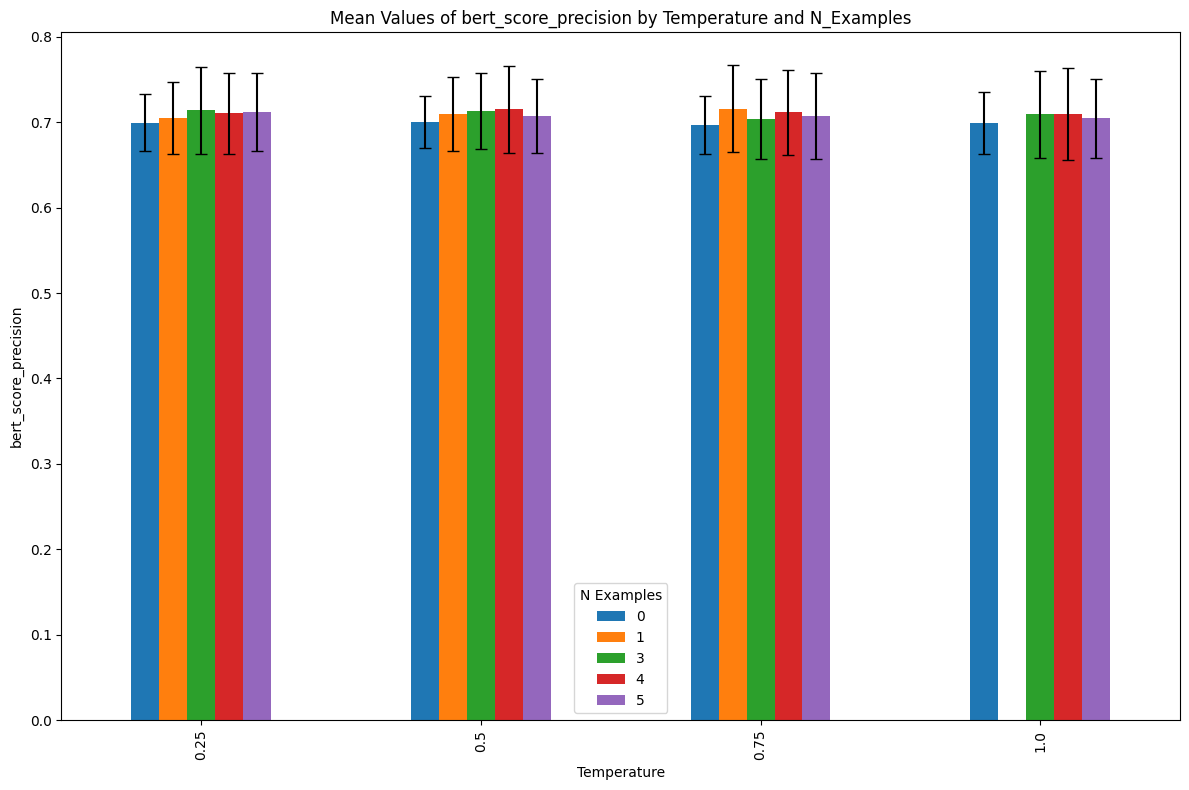

<Figure size 1000x600 with 0 Axes>

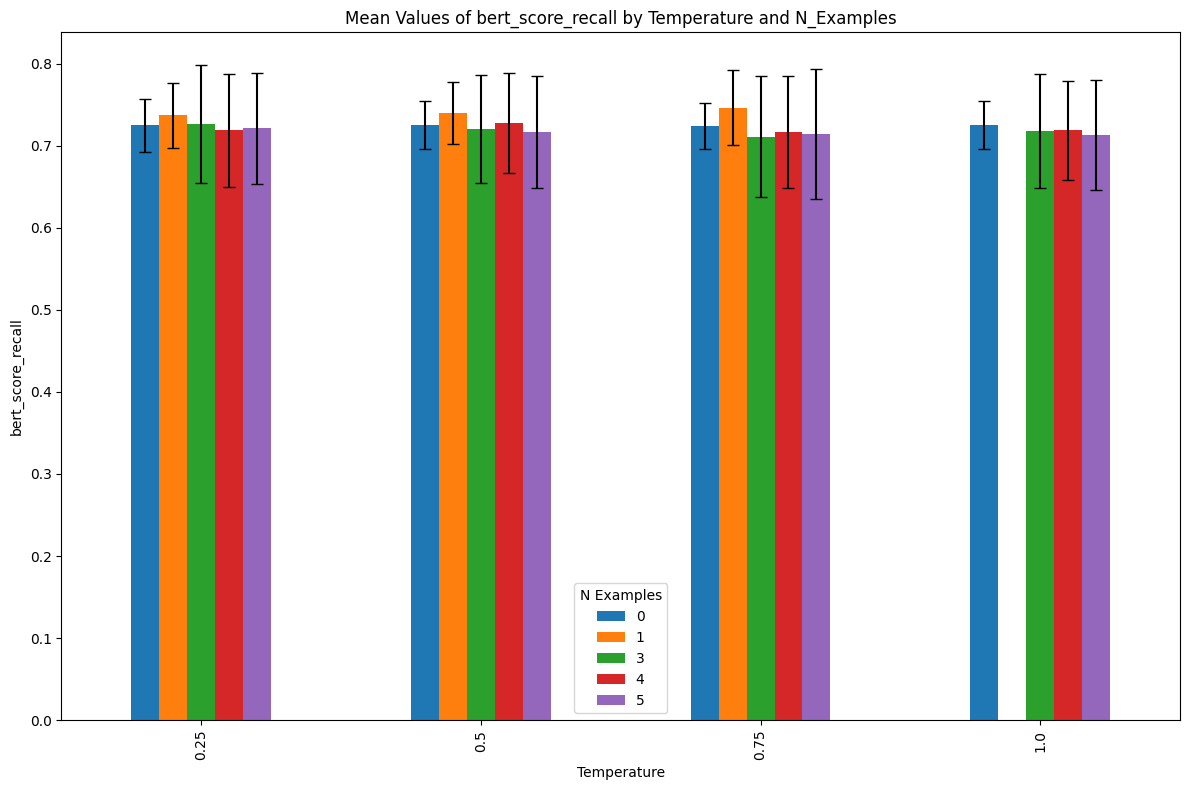

<Figure size 1000x600 with 0 Axes>

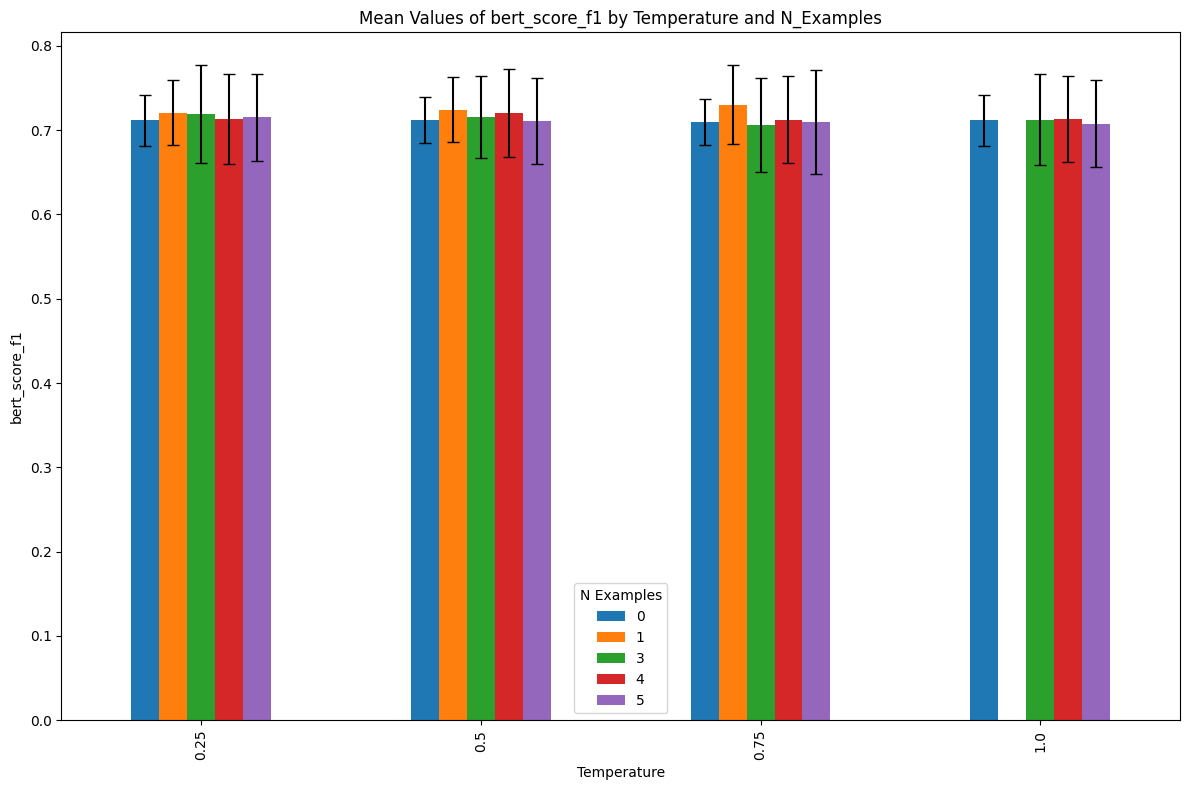

<Figure size 1000x600 with 0 Axes>

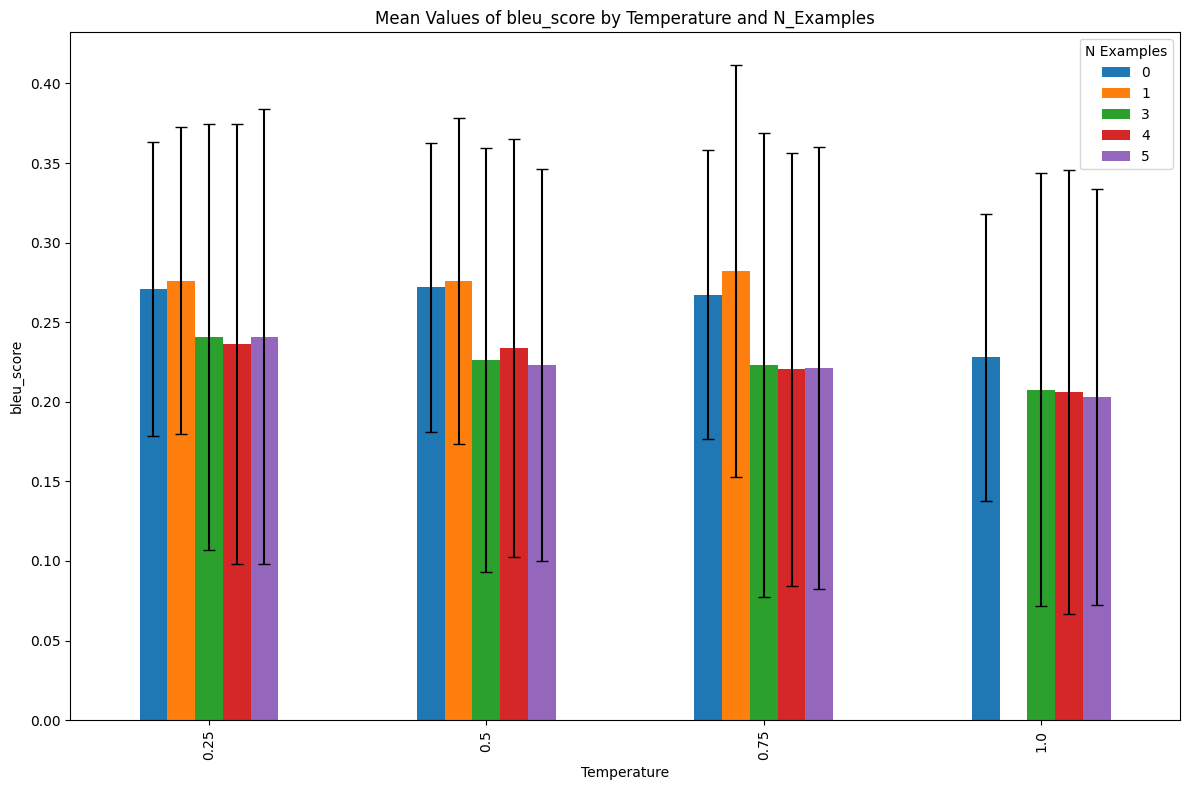

<Figure size 1000x600 with 0 Axes>

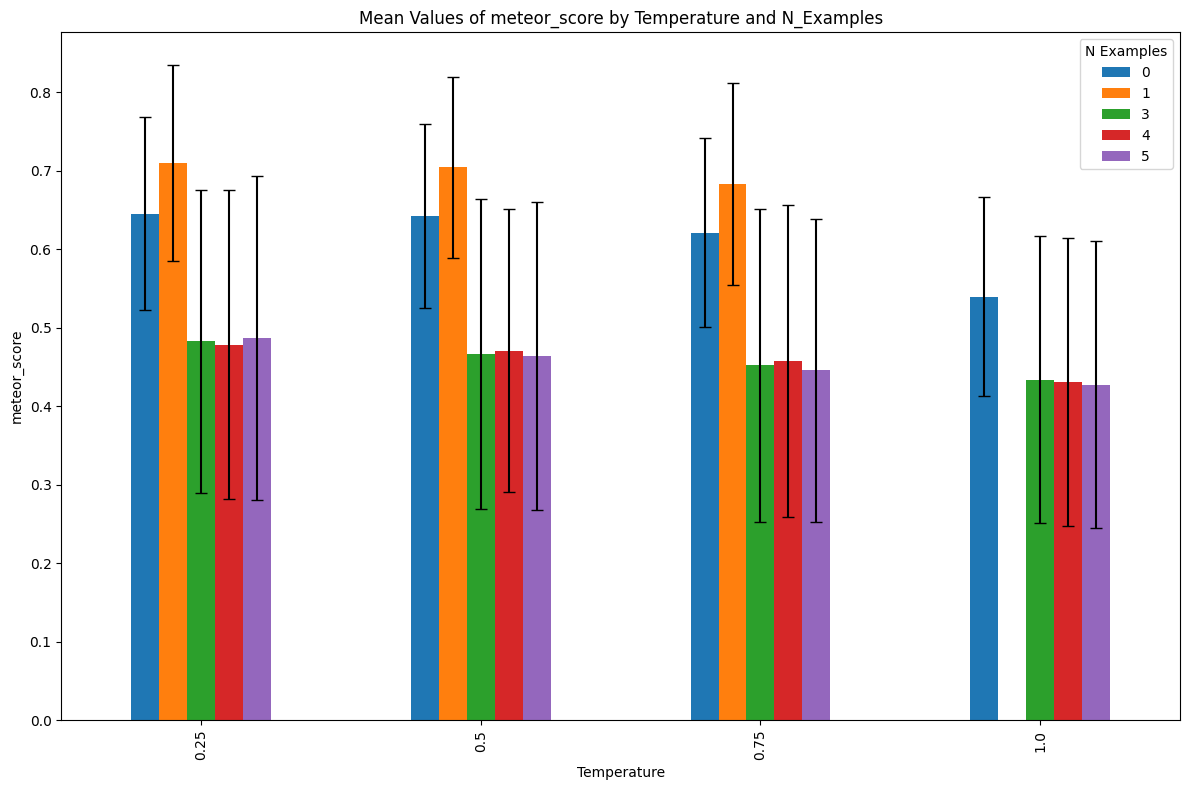

<Figure size 1000x600 with 0 Axes>

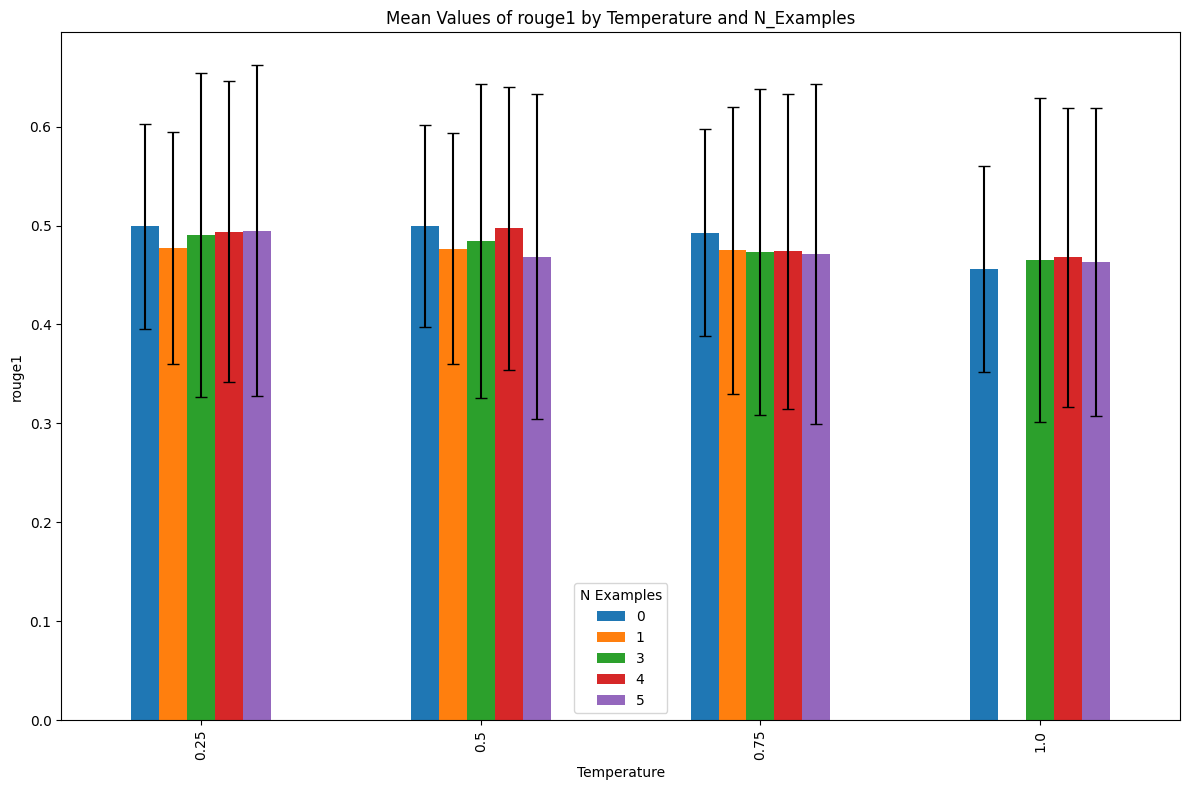

<Figure size 1000x600 with 0 Axes>

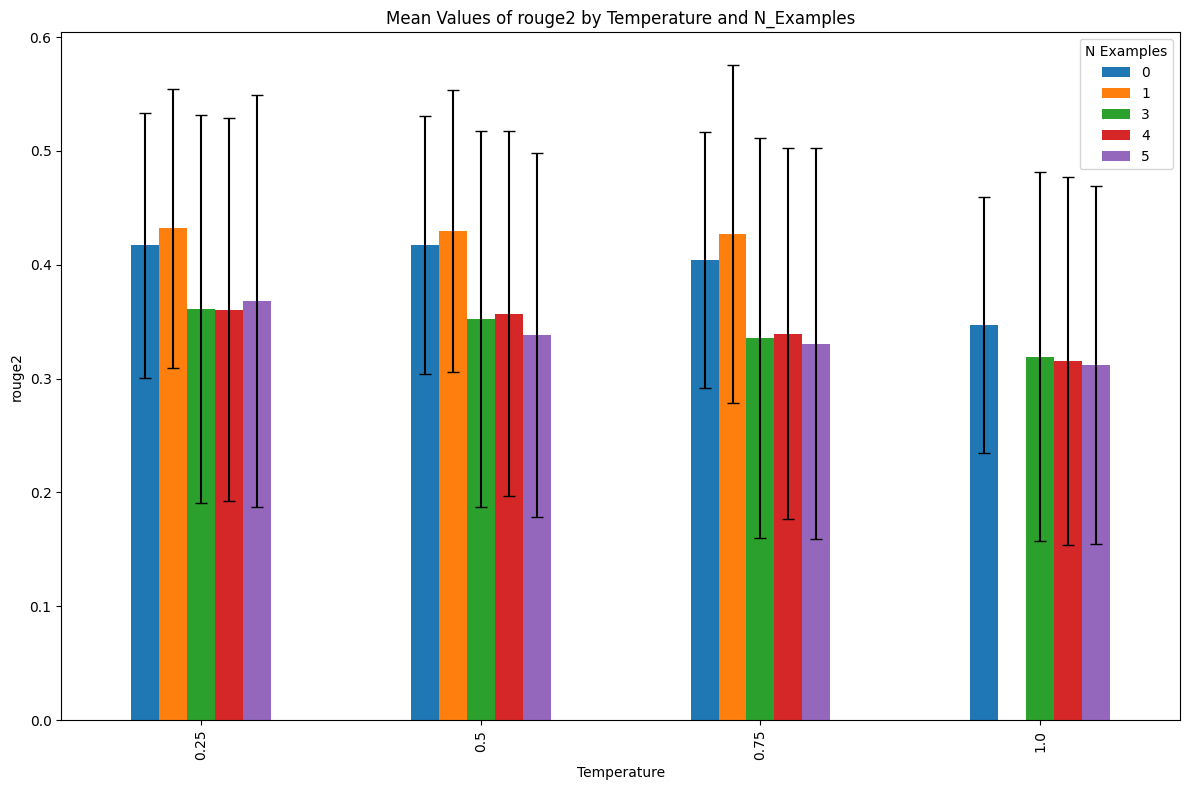

<Figure size 1000x600 with 0 Axes>

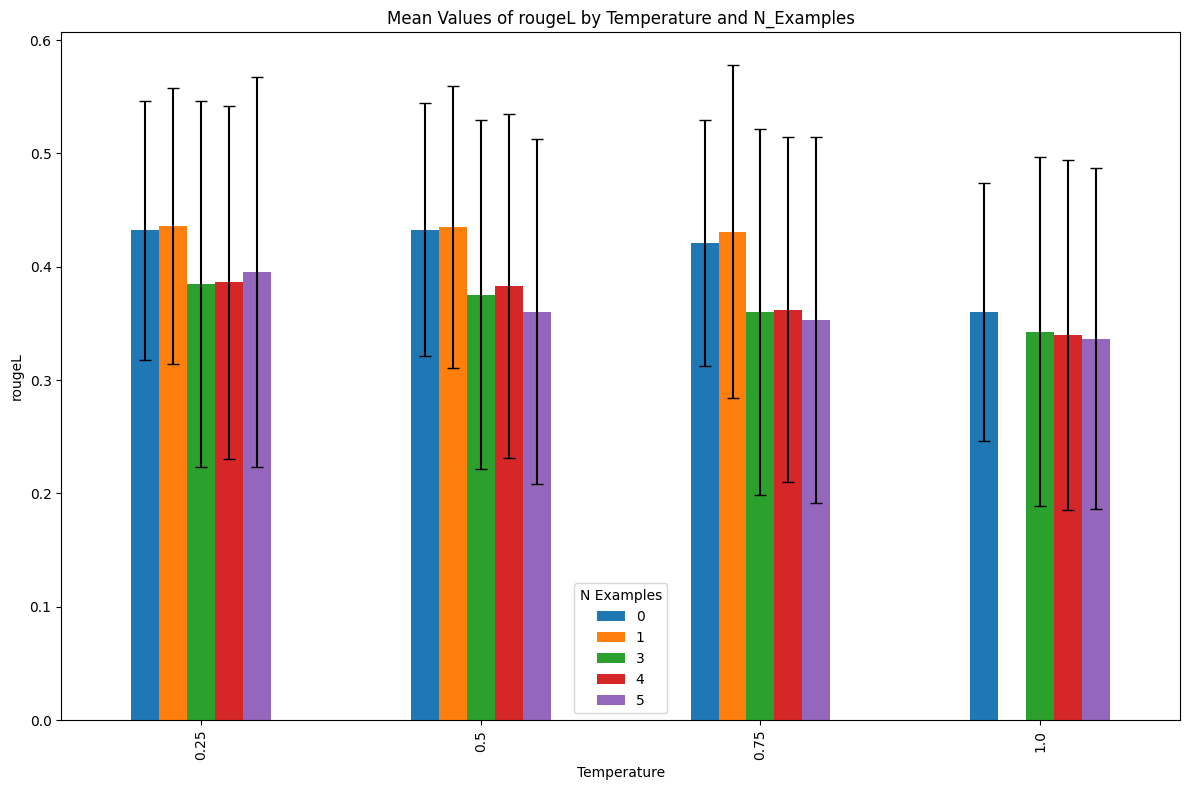

In [33]:
import matplotlib.pyplot as plt

for metric in df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples', 'temperature'], axis=1).columns:
    means = summary[(metric, 'mean')].unstack()
    std_devs = summary[(metric, 'std')].unstack()

    plt.figure(figsize=(10, 6))
    means.plot(kind='bar', yerr=std_devs, capsize=4, figsize=(12, 8))
    plt.title(f'Mean Values of {metric} by Temperature and N_Examples')
    plt.ylabel(metric)
    plt.xlabel('Temperature')
    plt.legend(title="N Examples")
    plt.tight_layout()
    plt.show()

In [37]:
df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples', 'temperature'], axis=1).columns

Index(['bert_score_precision', 'bert_score_recall', 'bert_score_f1',
       'bleu_score', 'meteor_score', 'rouge1', 'rouge2', 'rougeL'],
      dtype='object')

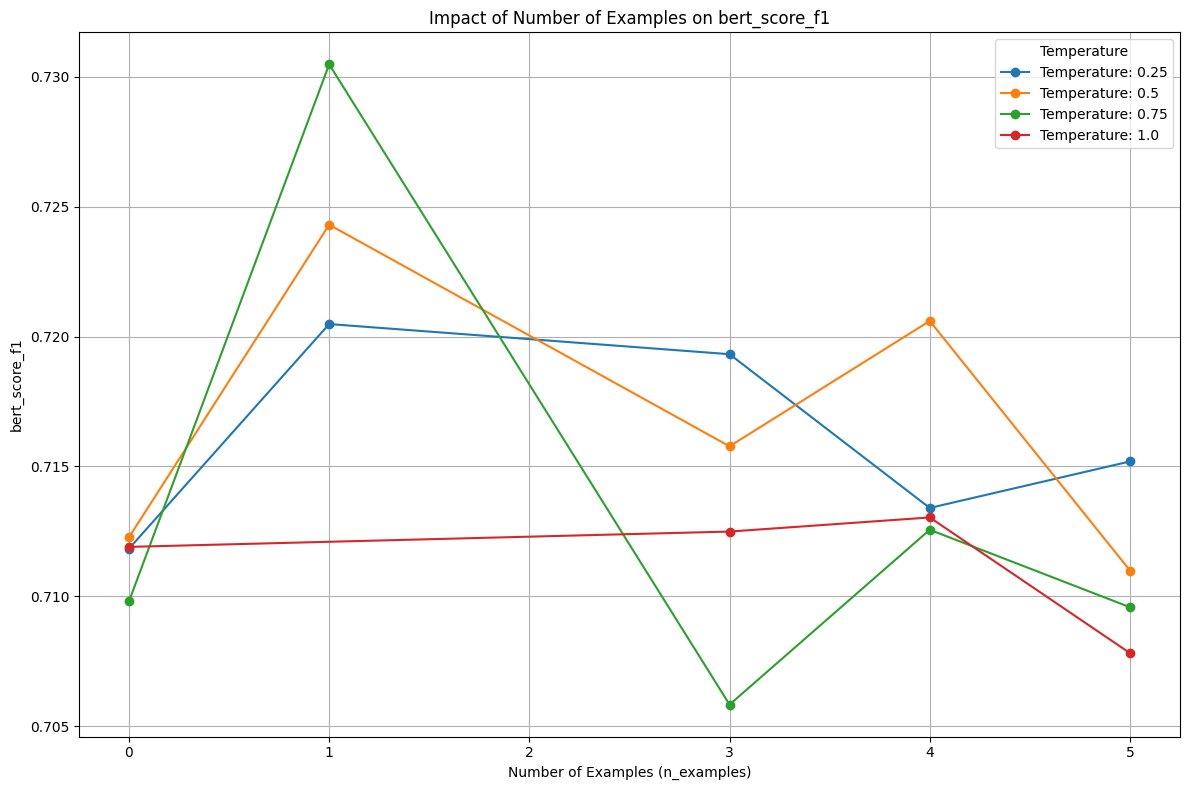

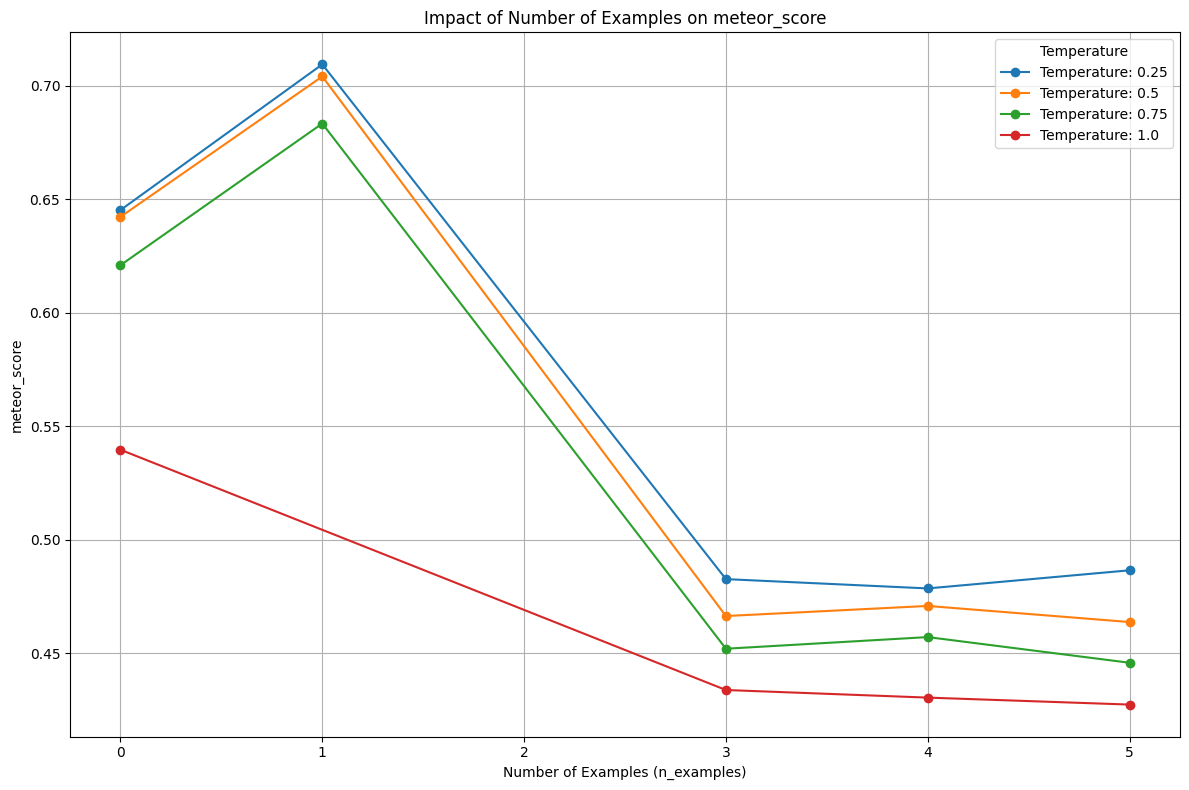

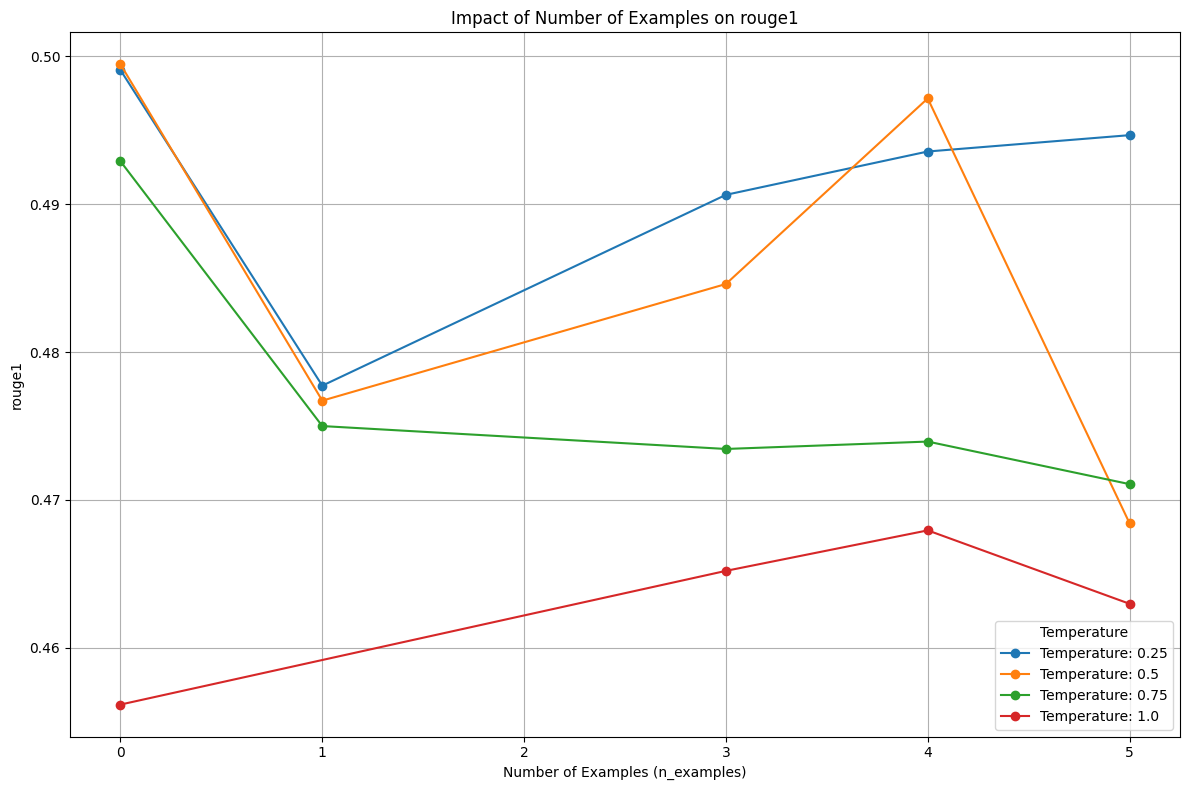

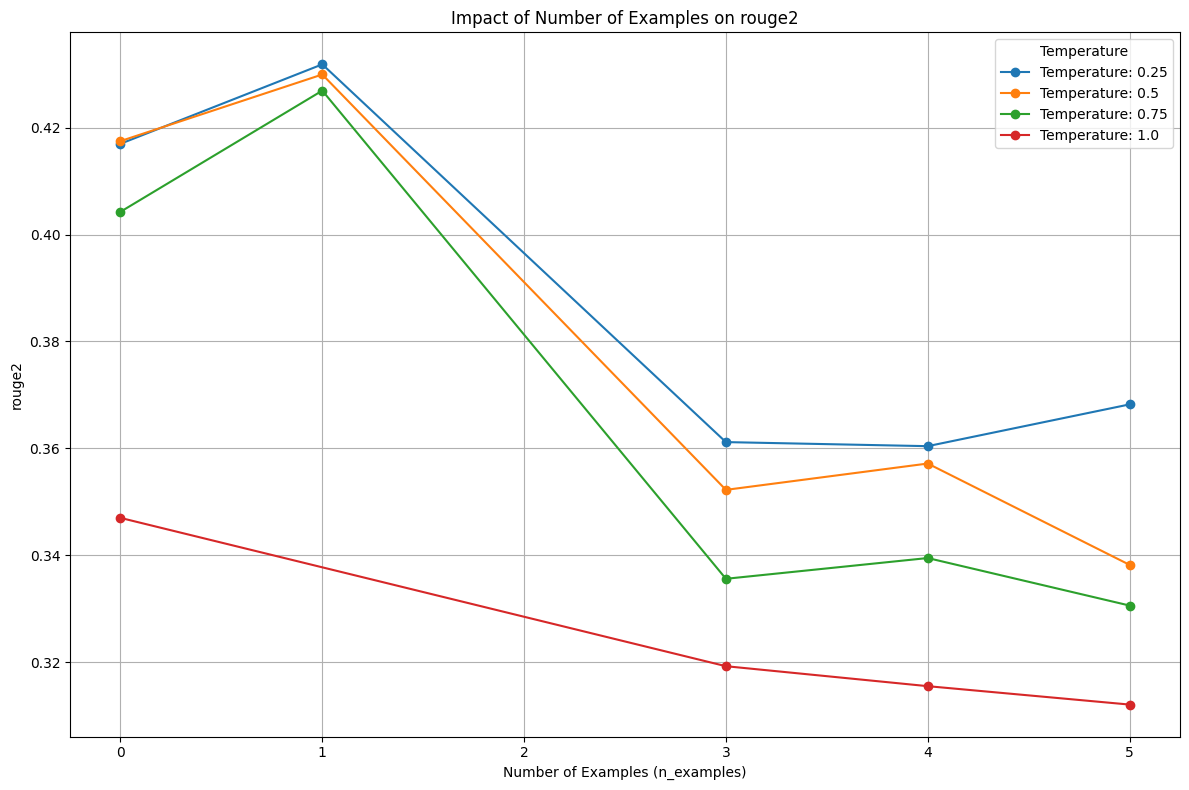

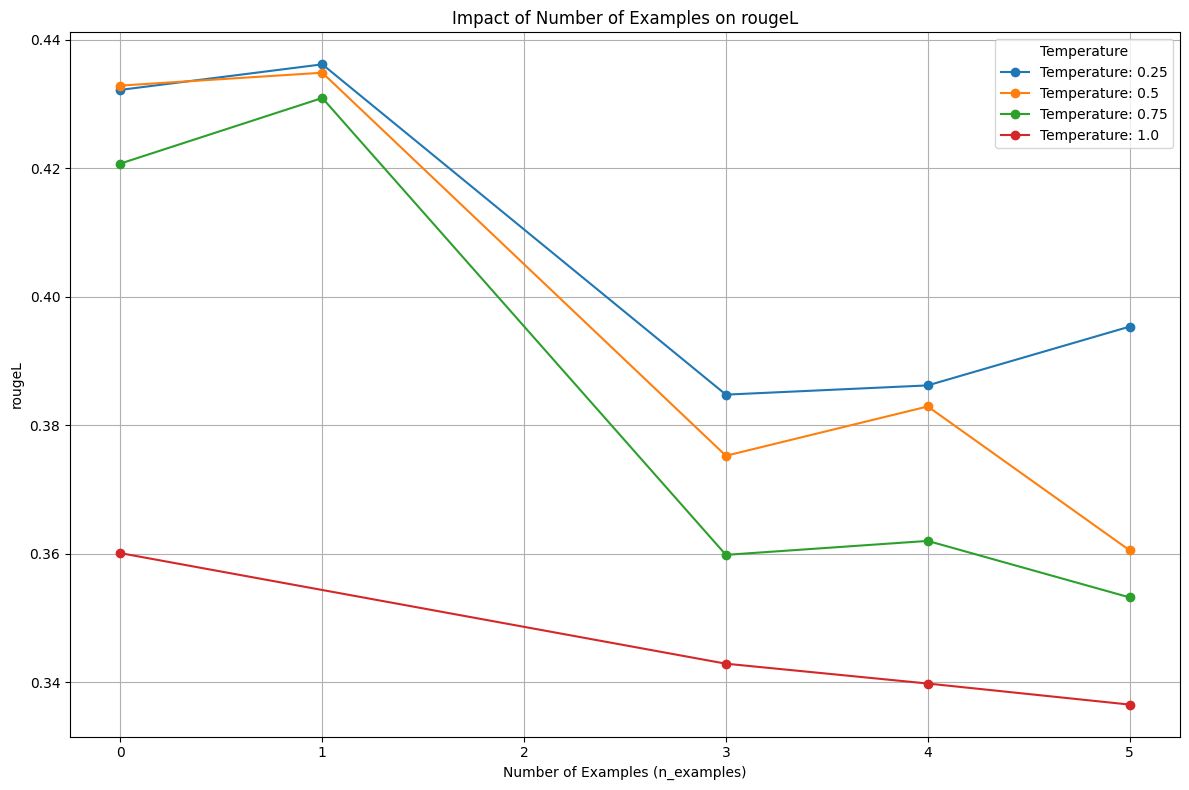

In [38]:
metrics = ['bert_score_f1', 'meteor_score', 'rouge1', 'rouge2', 'rougeL']
group = df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model'], axis=1).groupby(
        ['temperature', 'n_examples']
    ).mean().reset_index()

for metric in metrics:
    # Gráfico 1: Impacto do número de exemplos (n_examples), separando por temperatura
    plt.figure(figsize=(12, 8))
    for temp in group['temperature'].unique():
        subset = group[group['temperature'] == temp]
        plt.plot(subset['n_examples'], subset[metric], marker='o', label=f"Temperature: {temp}")
    plt.title(f'Impact of Number of Examples on {metric}')
    plt.xlabel('Number of Examples (n_examples)')
    plt.ylabel(metric)
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.tight_layout()
    plt.show()